In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data From Source File
df = pd.read_csv('../Data/car-data.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [9]:
df.shape

(892, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Cleaning
- After Checking the data i found some issues in the data.Lets see one by one and solve all the issues.
  1. name column seems meaning less need to keep only first three words.
  2. company contains some numeric values also need to resolve this issue.
  3. year contains some characters need to remove and cast it to int.
  4. Price has Ask For Price string and ',' in between need to remove and set type to int.
  5. kms_driven has ',' and 'kms' will remove it and set type to int.
  6. fuel_type contains some nan values need to drop the rows.


In [11]:
# check for nan values.
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [14]:
# drop the rows that have nan fuel_type.
df = df[~df['fuel_type'].isna()]

In [22]:
# Resolve the issue with name
# Keep only first three words.
df['name'] = df['name'].str.split().str.slice(0,3).str.join(' ')

In [23]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel


In [25]:
# check issues with company
# After removing the nan values company column seems good to go.
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [31]:
# Issues with year
df.year.unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [28]:
# The only issue with year is it should be int not Object
df['year'] = df['year'].astype('int')

In [30]:
df.year.dtype

dtype('int32')

In [32]:
# Issue with Price
df.Price.unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [39]:
df['Price'] = df[~(df['Price'] == 'Ask For Price')]['Price'].str.replace(',','').astype('int')

In [49]:
df['Price'].fillna(df['Price'].mean().round(3),inplace=True)

In [51]:
df.Price.dtype

dtype('float64')

In [55]:
# Check the issues with kms_driven and solve it properly
df['kms_driven'] = df['kms_driven'].str.replace('kms','').str.strip().str.replace(',','').astype('int64')

In [57]:
df.kms_driven.dtype

dtype('int64')

In [58]:
# Check the issues with fuel_type and resovle the possible errors
df.fuel_type.unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [65]:
# Reset the index because after removal of nan values index was little bit invonvenient.
df.drop(columns=['level_0','index'],inplace=True)

In [66]:
df.sample(50)

,name,company,year,Price,kms_driven,fuel_type
375,Hyundai Verna 1.4,Hyundai,2014,375000.0,36000,Petrol
33,Maruti Suzuki Wagon,Maruti,2013,105000.0,39000,Petrol
716,Hyundai Santro Xing,Hyundai,2007,135000.0,47000,Petrol
256,Maruti Suzuki Ertiga,Maruti,2014,569999.0,45000,Petrol
747,Hyundai Grand i10,Hyundai,2014,320000.0,41000,Petrol
698,Mahindra Scorpio S4,Mahindra,2015,865000.0,30000,Diesel
25,Hyundai i20 Sportz,Hyundai,2012,100000.0,55000,Petrol
823,Hyundai Elite i20,Hyundai,2018,510000.0,2100,Petrol
585,Maruti Suzuki Alto,Maruti,2017,360000.0,9400,Petrol
259,Maruti Suzuki Dzire,Maruti,2009,220000.0,46000,Petrol


# Data Visualization
- lets explore the impact of different of columns on price.

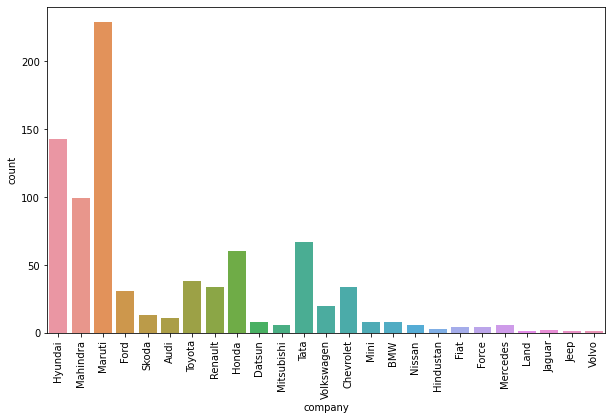

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(x='company',data=df)
plt.xticks(rotation=90);

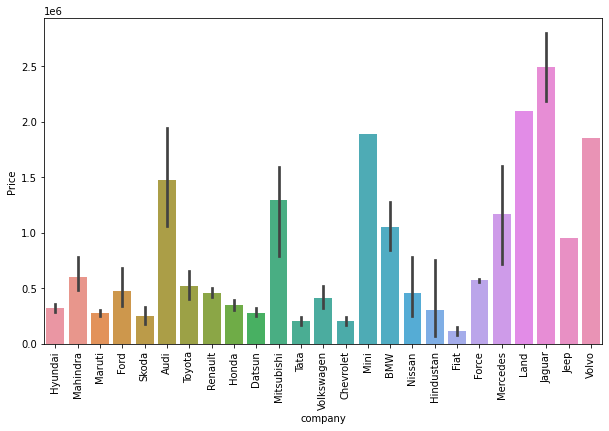

In [70]:
# company impact on price
plt.figure(figsize=(10,6))
sns.barplot(x='company',y='Price',data=df)
plt.xticks(rotation=90);

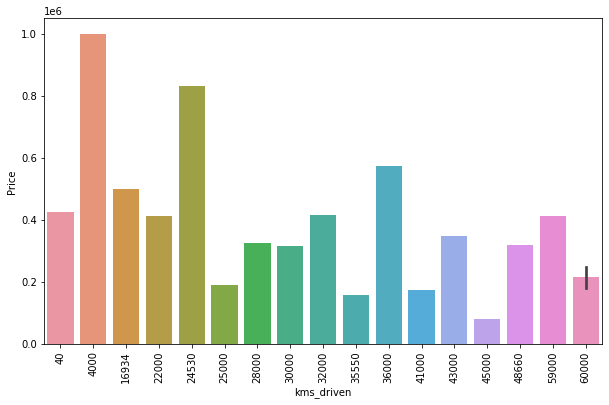

In [90]:
# company impact on price
plt.figure(figsize=(10,6))
sns.barplot(x='kms_driven',y='Price',data=df.head(20))
plt.xticks(rotation=90);

In [93]:
df.to_csv('../Data/car-cleaned-data.csv',index=False)